In [1]:
%matplotlib inline

In [2]:
from urllib.request import urlopen
import numpy as np

np.set_printoptions(precision=4, suppress=True)
import pandas as pd

pd.set_option('display.width', 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm


try:
    salary_table = pd.read_csv('salary.table')
except:
    url = "http://stats191.stanford.edu/data/salary.table"
    fh = urlopen(url)
    salary_table = pd.read_table(fh)
    salary_table.to_csv('salary.table')

In [3]:
E = salary_table.E
M = salary_table.M
X = salary_table.X
S = salary_table.S

In [4]:
salary_table

,Unnamed: 0,S,X,E,M
0,0,13876,1,1,1
1,1,11608,1,3,0
2,2,18701,1,3,1
3,3,11283,1,2,0
4,4,11767,1,3,0
5,5,20872,2,2,1
6,6,11772,2,2,0
7,7,10535,2,1,0
8,8,12195,2,3,0
9,9,12313,3,2,0


Text(0, 0.5, 'Salary')

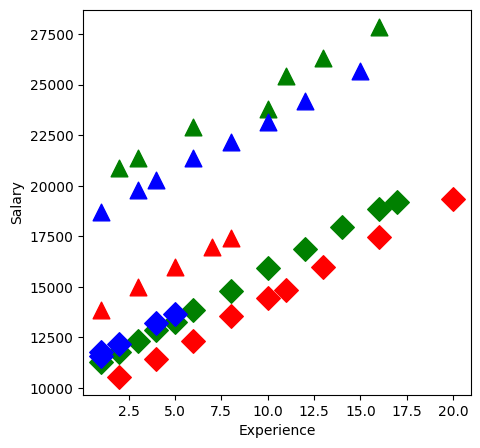

In [5]:
plt.figure(figsize=(5,5))
symbols = ['D','^']
colors = ['r', 'g', 'blue']
factor_groups = salary_table.groupby(["E", "M"])

for values, group in factor_groups:
    i, j = values
    plt.scatter(group["X"], group["S"], marker=symbols[j], color=colors[i-1], s=144)
plt.xlabel("Experience")
plt.ylabel("Salary")

In [6]:
formula = "S ~ C(E) + C(M) + X"
lm = ols(formula, salary_table).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           2.23e-27
Time:                        20:36:54   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8035.5976    386.689     20.781      0.0

In [7]:
lm.model.exog[:5]

array([[1., 0., 0., 1., 1.],
       [1., 0., 1., 0., 1.],
       [1., 0., 1., 1., 1.],
       [1., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1.]])

In [8]:
lm.model.data.orig_exog[:5]

,Intercept,C(E)[T.2],C(E)[T.3],C(M)[T.1],X
0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,1.0,1.0
3,1.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0


In [9]:
lm.model.data.frame[:5]

,Unnamed: 0,S,X,E,M
0,0,13876,1,1,1
1,1,11608,1,3,0
2,2,18701,1,3,1
3,3,11283,1,2,0
4,4,11767,1,3,0


In [10]:
infl = lm.get_influence()
print(infl.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0  13876.000  15465.313      0.104     -1.683      0.155     -0.722     -1.723     -0.739
         1  11608.000  11577.992      0.000      0.031      0.130      0.012      0.031      0.012
         2  18701.000  18461.523      0.001      0.247      0.109      0.086      0.244      0.085
         3  11283.000  11725.817      0.005     -0.458      0.113     -0.163     -0.453     -0.162
         4  11767.000  11577.992      0.001      0.197      0.130      0.076      0.195      0.075
         5  20872.000  19155.532      0.092      1.787      0.126      0.678      1.838      0.698
         6  11772.000  12272.001      0.006     -0.513      0.101     -0.172     -0.509     -0.170
         7

In [11]:
df_infl = infl.summary_frame()
df_infl[:5]

,dfb_Intercept,dfb_C(E)[T.2],dfb_C(E)[T.3],dfb_C(M)[T.1],dfb_X,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.505123,0.376134,0.483977,-0.369677,0.399111,0.104186,-1.683099,0.155327,-0.721753,-1.723037,-0.738880
1,0.004663,0.000145,0.006733,-0.006220,-0.004449,0.000029,0.031318,0.130266,0.012120,0.030934,0.011972
2,0.013627,0.000367,0.036876,0.030514,-0.034970,0.001492,0.246931,0.109021,0.086377,0.244082,0.085380
3,-0.083152,-0.074411,0.009704,0.053783,0.105122,0.005338,-0.457630,0.113030,-0.163364,-0.453173,-0.161773
4,0.029382,0.000917,0.042425,-0.039198,-0.028036,0.001166,0.197257,0.130266,0.076340,0.194929,0.075439


Text(0, 0.5, 'Residuals')

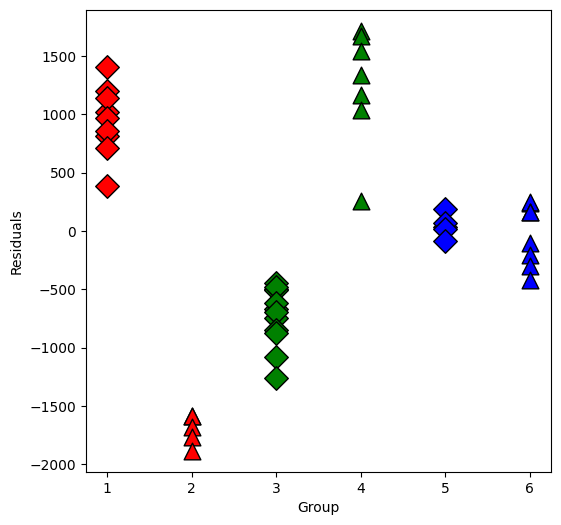

In [12]:
# Now plot the residuals withing the groups separartely


resid = lm.resid
plt.figure(figsize=(6,6))
for values, group in factor_groups:
    i, j = values
    group_num = i *2 + j-1
    x = [group_num] * len(group)
    plt.scatter(
        x,
        resid[group.index],
        marker = symbols[j],
        color = colors[i-1],
        s = 144,
        edgecolors='black'
    )

plt.xlabel('Group')
plt.ylabel('Residuals')

In [13]:
interX_lm = ols("S ~ C(E) * X + C(M)", salary_table).fit()
print(interX_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     158.6
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           8.23e-26
Time:                        20:36:55   Log-Likelihood:                -379.47
No. Observations:                  46   AIC:                             772.9
Df Residuals:                      39   BIC:                             785.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7256.2800    549.494     13.205      

In [14]:
# Do an ANOVA check

from statsmodels.stats.api import anova_lm

table1 = anova_lm(lm, interX_lm)
print(table1)


interM_lm = ols("S ~ X + C(E)*C(M)", data=salary_table).fit()
print(interM_lm.summary())


table2 = anova_lm(lm, interM_lm)
print(table2)

   df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0      41.0  4.328072e+07      0.0           NaN       NaN       NaN
1      39.0  3.941068e+07      2.0  3.870040e+06  1.914856  0.160964
                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5517.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           1.67e-55
Time:                        20:36:55   Log-Likelihood:                -298.74
No. Observations:                  46   AIC:                             611.5
Df Residuals:                      39   BIC:                             624.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
   

In [15]:
interM_lm.model.data.orig_exog[:5]

,Intercept,C(E)[T.2],C(E)[T.3],C(M)[T.1],C(E)[T.2]:C(M)[T.1],C(E)[T.3]:C(M)[T.1],X
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,1.0,0.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
# The design matrix as an ndarray

interM_lm.model.exog
interM_lm.model.exog_names

['Intercept',
 'C(E)[T.2]',
 'C(E)[T.3]',
 'C(M)[T.1]',
 'C(E)[T.2]:C(M)[T.1]',
 'C(E)[T.3]:C(M)[T.1]',
 'X']

Text(0, 0.5, 'standardized resids')

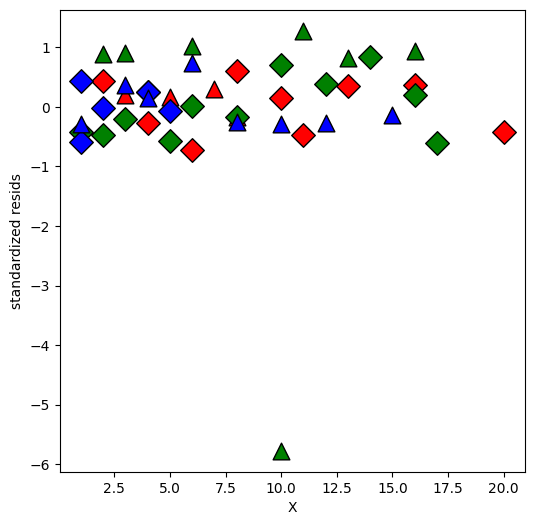

In [17]:
infl = interM_lm.get_influence()
resid = infl.resid_studentized_internal

plt.figure(figsize=(6,6))
for values, group in factor_groups:
    i,j = values
    idx = group.index
    plt.scatter(
        X[idx],
        resid[idx],
        marker = symbols[j],
        color = colors[i-1],
        s=144,
        edgecolors='black'
    )

plt.xlabel("X")
plt.ylabel("standardized resids")

In [18]:
# Since there is an outlier, we have decided to drop it

drop_idx = abs(resid).argmax()

print(drop_idx)
idx = salary_table.index.drop(drop_idx)


lm32 = ols("S~C(E)+X+C(M)", data=salary_table, subset=idx).fit()
print(lm32.summary())
print('\n')

32
                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     211.7
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           2.45e-26
Time:                        20:42:03   Log-Likelihood:                -373.79
No. Observations:                  45   AIC:                             757.6
Df Residuals:                      40   BIC:                             766.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8044.7518    392.781     20.482      

In [19]:
interX_lm32 = ols("S~C(E)*X + C(M)", data=salary_table, subset=idx).fit()
print(interX_lm32.summary())
print('\n')


table3 = anova_lm(lm32, interX_lm32)
print(table3)
print('\n')

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     147.7
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           8.97e-25
Time:                        20:44:41   Log-Likelihood:                -371.70
No. Observations:                  45   AIC:                             757.4
Df Residuals:                      38   BIC:                             770.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7266.0887    558.872     13.001      

In [20]:
interM_lm32 = ols("S ~ X + C(E) * C(M)", data=salary_table, subset=idx).fit()

table4 = anova_lm(lm32, interM_lm32)
print(table4)
print("\n")

   df_resid           ssr  df_diff       ss_diff            F        Pr(>F)
0      40.0  4.320910e+07      0.0           NaN          NaN           NaN
1      38.0  1.711881e+05      2.0  4.303791e+07  4776.734853  2.291239e-46




Text(0, 0.5, 'standardized resids')

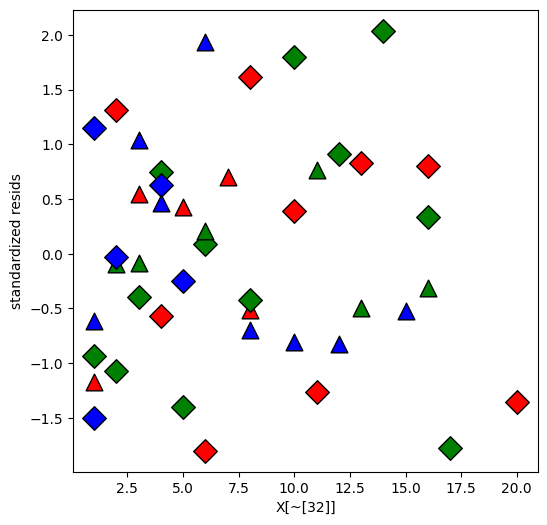

In [21]:
#replot the residuals
resid = interM_lm32.get_influence().summary_frame()["standard_resid"]

plt.figure(figsize=(6, 6))
resid = resid.reindex(X.index)
for values, group in factor_groups:
    i, j = values
    idx = group.index
    plt.scatter(
        X.loc[idx],
        resid.loc[idx],
        marker=symbols[j],
        color=colors[i - 1],
        s=144,
        edgecolors="black",
    )
plt.xlabel("X[~[32]]")
plt.ylabel("standardized resids")


Text(0, 0.5, 'Salary')

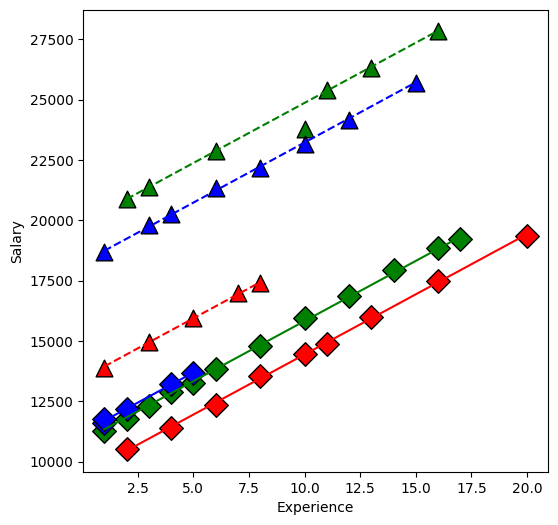

In [22]:
lm_final = ols("S ~ X + C(E)*C(M)", data=salary_table.drop([drop_idx])).fit()
mf = lm_final.model.data.orig_exog
lstyle = ["-", "--"]

plt.figure(figsize=(6, 6))
for values, group in factor_groups:
    i, j = values
    idx = group.index
    plt.scatter(
        X[idx],
        S[idx],
        marker=symbols[j],
        color=colors[i - 1],
        s=144,
        edgecolors="black",
    )
    # drop NA because there is no idx 32 in the final model
    fv = lm_final.fittedvalues.reindex(idx).dropna()
    x = mf.X.reindex(idx).dropna()
    plt.plot(x, fv, ls=lstyle[j], color=colors[i - 1])
plt.xlabel("Experience")
plt.ylabel("Salary")
